In [19]:
import numpy as np
import struct
from sklearn import svm, metrics
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [20]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    accuracy = np.mean(np.max(cm,axis=1))
    print(accuracy)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return accuracy

In [22]:
root = './data'
download = True

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)

In [23]:
raw_train = read_idx("/content/data/MNIST/raw/train-images-idx3-ubyte")
train_data = np.reshape(raw_train,(60000,28*28))
train_label = read_idx("/content/data/MNIST/raw/train-labels-idx1-ubyte")

raw_test = read_idx("/content/data/MNIST/raw/t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test,(10000,28*28))
test_label = read_idx("/content/data/MNIST/raw/t10k-labels-idx1-ubyte")


<ipython-input-20-6a24037f0b58>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


In [24]:
X = train_data[:10000]/255.0
Y = train_label[:10000]
svc = svm.SVC(C=0.5, gamma=0.05).fit(X,Y)

In [25]:
x_test = test_data[:2000]/255.0
y_true = test_label[:2000]
y_pred = svc.predict(x_test)

Normalized confusion matrix
0.9390188436447863


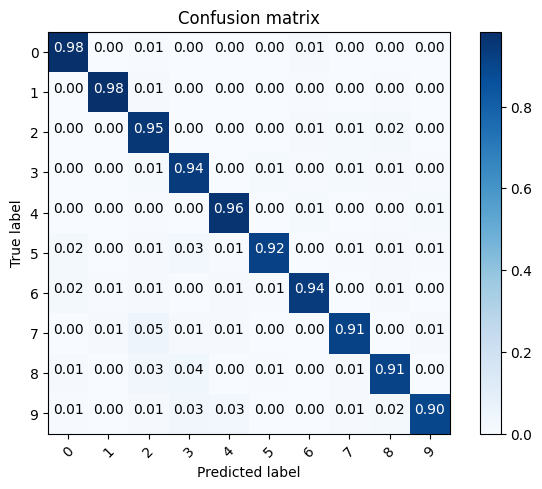

In [26]:
cm = metrics.confusion_matrix(y_true, y_pred)
accuracy=plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'],normalize=True)

Confusion matrix, without normalization
188.0


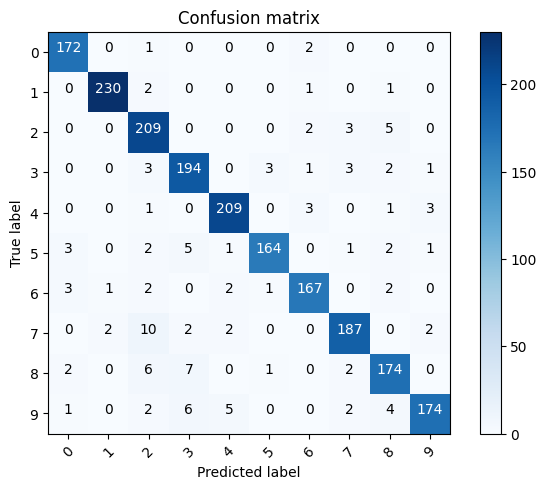

In [27]:
accuracy=plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'])